In [110]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris()

In [111]:
x_vals = [[x[1], x[2],x[3]] for x in iris.data]
y_vals = [y[0] for y in iris.data]

X = tf.constant(x_vals,dtype= tf.float32)
Y = tf.constant(y_vals,dtype = tf.float32)

# make results reproducible
np.random.seed(13)
tf.random.set_seed(13)

deltaA = tf.constant(0,tf.float32)
deltab = tf.constant(0,tf.float32)
loss = tf.constant(0,tf.float32)

$$loss = \sum_{i=1}^{N}\left(y_{i} - \hat{y_{i}} \right)^{2} + λ \sum_{j=0}^{p} A^2 + λ \sum_{j=0}^{p} |A| $$

In [112]:
# Create variables for linear regression
A = tf.Variable(tf.random.normal(shape=[3,1]))
b = tf.Variable(tf.random.normal(shape=[1,1]))

In [113]:
model_output = tf.add(tf.tensordot(X,A,axes =1),b)

# Declare the elastic net loss function
elastic_param1 = tf.constant(1.) # for L1
elastic_param2 = tf.constant(1.) # for L2

l1_a_loss = tf.reduce_mean(tf.abs(A))
l2_a_loss = tf.reduce_mean(tf.square(A))

e1_term = tf.multiply(elastic_param1, l1_a_loss)
e2_term = tf.multiply(elastic_param2, l2_a_loss)


In [114]:
deltaA = tf.constant(0,tf.float32)
deltab = tf.constant(0,tf.float32)
loss = tf.constant(0,tf.float32)

epochs = []
loss = []

In [115]:
for i in range(200):
    with tf.GradientTape() as tape:
        model_output = tf.add(tf.tensordot(X,A,axes =1),b)
        loss_ =  tf.add(tf.add(tf.reduce_mean(tf.square((Y - model_output))),e1_term),e2_term)
        deltaA,deltab = tape.gradient(loss_,[A,b])

        changeA = deltaA * 0.01
        changeb = deltab * 0.01

        epochs.append(i)
        loss.append(loss_)

        A.assign_sub(changeA)
        b.assign_sub(changeb)

Text(0, 0.5, 'Loss')

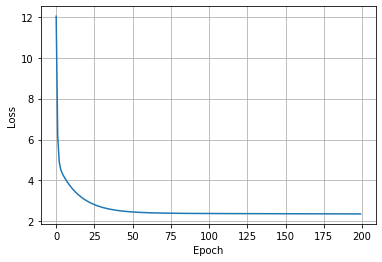

In [118]:
plt.plot(epochs,loss)
plt.grid()
plt.xlabel('Epoch')
plt.ylabel("Loss")